In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
from sklearn.metrics import mean_squared_error, r2_score

weather_db = pd.read_csv("Dataset/weather_dataset.csv")
weather_db

,年,月,日,當地氣壓,海平面氣壓,最大降水量,一小時降水量,10分鐘降水量,平均氣溫,最高氣溫,最低氣溫,平均濕度,最小濕度,日照時間,開花日
0,1961,1,1,1011.7,1012.4,0.0,0.0,0.0,2.1,7.9,-3.9,41.0,15.0,8.6,0
1,1961,1,2,1020.2,1021.0,0.0,0.0,0.0,1.5,9.2,-3.3,51.0,26.0,8.7,0
2,1961,1,3,1021.3,1022.1,0.1,0.8,0.0,2.5,7.3,-2.4,58.0,37.0,5.4,0
3,1961,1,4,1004.6,1005.3,20.2,13.9,3.2,4.7,11.5,0.6,60.0,38.0,1.0,0
4,1961,1,5,1016.3,1017.0,0.0,0.0,0.0,3.8,7.7,1.4,33.0,19.0,8.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23371,2024,12,27,1006.9,1009.9,0.0,0.0,0.0,7.4,12.7,3.8,51.0,38.0,6.1,0
23372,2024,12,28,1008.1,1011.1,0.0,0.0,0.0,5.4,11.5,1.4,59.0,36.0,7.5,0
23373,2024,12,29,1013.4,1016.4,0.0,0.0,0.0,6.0,12.3,0.5,54.0,31.0,8.9,0
23374,2024,12,30,1017.1,1020.1,0.0,0.0,0.0,6.2,10.3,3.5,53.0,32.0,5.0,0


使用 Hayashi 等人提出的下列公式，計算每一年的 Dj，也就是櫻花冬眠結束到開始準備開花的那一天
通常計算 Dj 天數的日期為 2月1日 開始

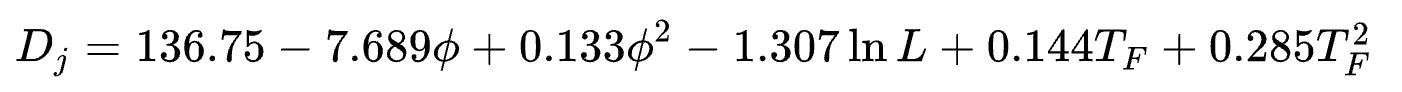

In [4]:
from IPython.display import Image
Image(filename='Image/Dj Formula.png')

    •\phi：緯度（以十進位表示，東京是 35^\circ40{\prime} = 35.6667）
	•L：距離海岸的距離，東京為 4km
	•T_F：該年 1～3 月的平均氣溫（使用 平均氣溫 欄位）

In [6]:
import math

# 設定固定參數
phi = 35 + 40 / 60  # 緯度：35度40分 -> 十進位表示
L = 4  # 海岸距離（公里）

### 計算指定年份的TF（1～3月平均氣溫） -> 以1961為例

In [8]:
# 計算指定年份的TF（1～3月平均氣溫） -> 以1961為例
averageT_1961 = weather_db[weather_db["年"] == 1961]
averageT_1961

,年,月,日,當地氣壓,海平面氣壓,最大降水量,一小時降水量,10分鐘降水量,平均氣溫,最高氣溫,最低氣溫,平均濕度,最小濕度,日照時間,開花日
0,1961,1,1,1011.7,1012.4,0.0,0.0,0.0,2.1,7.9,-3.9,41.0,15.0,8.6,0
1,1961,1,2,1020.2,1021.0,0.0,0.0,0.0,1.5,9.2,-3.3,51.0,26.0,8.7,0
2,1961,1,3,1021.3,1022.1,0.1,0.8,0.0,2.5,7.3,-2.4,58.0,37.0,5.4,0
3,1961,1,4,1004.6,1005.3,20.2,13.9,3.2,4.7,11.5,0.6,60.0,38.0,1.0,0
4,1961,1,5,1016.3,1017.0,0.0,0.0,0.0,3.8,7.7,1.4,33.0,19.0,8.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1961,12,27,1008.3,1009.0,0.0,0.0,0.0,4.4,11.3,-1.3,38.0,16.0,8.3,0
361,1961,12,28,1007.2,1007.9,0.0,0.0,0.0,4.0,11.2,-1.9,38.0,18.0,8.7,0
362,1961,12,29,1009.3,1009.9,0.0,0.0,0.0,4.8,11.7,-1.1,45.0,24.0,7.7,0
363,1961,12,30,1014.5,1015.3,0.0,0.0,0.0,4.3,10.2,-0.8,52.0,28.0,7.8,0


In [9]:
averageT_jan_to_mar = averageT_1961[averageT_1961["月"].isin([1, 2, 3])]
averageT_jan_to_mar

,年,月,日,當地氣壓,海平面氣壓,最大降水量,一小時降水量,10分鐘降水量,平均氣溫,最高氣溫,最低氣溫,平均濕度,最小濕度,日照時間,開花日
0,1961,1,1,1011.7,1012.4,0.0,0.0,0.0,2.1,7.9,-3.9,41.0,15.0,8.6,0
1,1961,1,2,1020.2,1021.0,0.0,0.0,0.0,1.5,9.2,-3.3,51.0,26.0,8.7,0
2,1961,1,3,1021.3,1022.1,0.1,0.8,0.0,2.5,7.3,-2.4,58.0,37.0,5.4,0
3,1961,1,4,1004.6,1005.3,20.2,13.9,3.2,4.7,11.5,0.6,60.0,38.0,1.0,0
4,1961,1,5,1016.3,1017.0,0.0,0.0,0.0,3.8,7.7,1.4,33.0,19.0,8.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1961,3,27,1007.1,1007.8,3.2,1.3,0.3,3.2,5.5,0.6,83.0,69.0,0.0,0
86,1961,3,28,1013.7,1014.3,0.0,0.0,0.0,7.8,14.9,0.9,51.0,28.0,10.7,0
87,1961,3,29,1023.2,1023.9,0.0,0.0,0.0,9.2,15.5,2.9,56.0,31.0,9.9,0
88,1961,3,30,1016.7,1017.4,0.0,0.0,0.0,13.8,21.9,5.2,58.0,27.0,10.0,0


In [10]:
averageT_1961_jan_to_mar = averageT_jan_to_mar["平均氣溫"].mean()
averageT_1961_jan_to_mar

np.float64(5.471111111111112)

### 計算 1961年從1月1日起，冬眠結束所需要的日數

In [12]:
# 套用公式計算 Dj
Dj = (
    136.75
    - 7.689 * phi
    + 0.133 * phi ** 2
    - 1.307 * np.log(L)
    + 0.144 * averageT_1961_jan_to_mar
    + 0.285 * averageT_1961_jan_to_mar ** 2
)

# 四捨五入後為當年度的 Dj（大約是從每年2月1日算起的第幾天）
print(f"1961 年的 Dj ≈ 第 {round(Dj)} 天")

1961 年的 Dj ≈ 第 39 天


### 計算資料集中全年度 1-3 月的平均溫度

In [14]:
# 先取得資料中出現過的年份
allyears = weather_db["年"].unique()

# 用來儲存結果
dj_days = []

# 對每一年做計算
for year in allyears:
    # 篩選該年份的1~3月資料
    subset = weather_db[(weather_db["年"] == year) & (weather_db["月"].isin([1, 2, 3]))]
    
    # 計算當年1~3月平均氣溫
    TF = subset["平均氣溫"].mean()
    
    # 套用Hayashi公式計算Dj
    Dj = (
        136.75
        - 7.689 * phi
        + 0.133 * phi ** 2
        - 1.307 * np.log(L)
        + 0.144 * TF
        + 0.285 * TF ** 2
    )
    # 存成一筆 tuple，放進 list
    dj_days.append((year, round(Dj)))

# 轉成 DataFrame
allyears_dj_days = pd.DataFrame(dj_days, columns=["年", "Dj"])

# 顯示前幾筆
print(allyears_dj_days)

       年  Dj
0   1961  39
1   1962  42
2   1963  38
3   1964  40
4   1965  39
..   ...  ..
59  2020  53
60  2021  54
61  2022  45
62  2023  53
63  2024  50

[64 rows x 2 columns]


### 將資料集全年度的冬眠所需日數資料視覺化

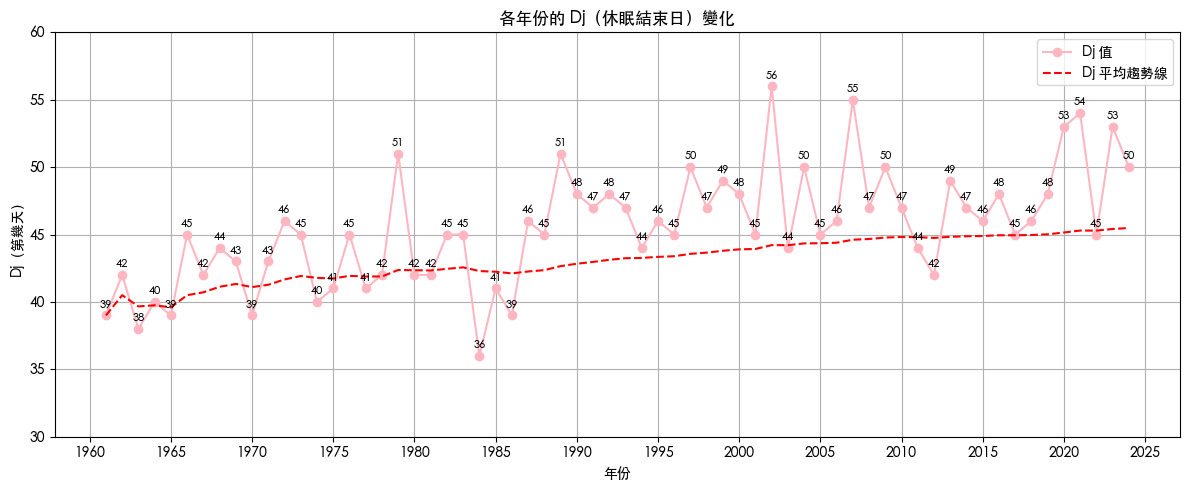

In [16]:
# 計算逐年累積平均 Dj 作為趨勢線
alltears_dj_days_avg = [allyears_dj_days["Dj"][:i+1].mean() for i in range(len(allyears_dj_days))]

plt.rcParams['font.family'] = 'Heiti TC'

# 繪製折線圖
plt.figure(figsize=(12, 5))
plt.plot(allyears_dj_days["年"], allyears_dj_days["Dj"], marker='o', linestyle='-', color='lightpink', label='Dj 值')
plt.plot(allyears_dj_days["年"], alltears_dj_days_avg, '--r', label='Dj 平均趨勢線')  
plt.title("各年份的 Dj（休眠結束日）變化")
plt.xlabel("年份")
plt.ylabel("Dj（第幾天）")
plt.grid(True)

for x, y in zip(allyears_dj_days['年'], allyears_dj_days["Dj"]):
    plt.text(x, y + 0.5, str(int(y)), ha='center', fontsize=8)  # y+0.5 讓文字浮在點上方一點

plt.legend()
plt.xticks(np.arange(1960, 2026, 5))
plt.yticks(np.arange(30, 65, 5))
plt.tight_layout()
plt.savefig('各年份的 Dj 變化', dpi=300, bbox_inches='tight')
plt.show()

### 計算訓練集年度的冬眠所需日數（Dj）

In [18]:
train = pd.read_csv("Dataset/train.csv")
train

,年,月,日,當地氣壓,海平面氣壓,最大降水量,一小時降水量,10分鐘降水量,平均氣溫,最高氣溫,最低氣溫,平均濕度,最小濕度,日照時間,開花日
0,1961,1,1,1011.7,1012.4,0.0,0.0,0.0,2.1,7.9,-3.9,41.0,15.0,8.6,0
1,1961,1,2,1020.2,1021.0,0.0,0.0,0.0,1.5,9.2,-3.3,51.0,26.0,8.7,0
2,1961,1,3,1021.3,1022.1,0.1,0.8,0.0,2.5,7.3,-2.4,58.0,37.0,5.4,0
3,1961,1,4,1004.6,1005.3,20.2,13.9,3.2,4.7,11.5,0.6,60.0,38.0,1.0,0
4,1961,1,5,1016.3,1017.0,0.0,0.0,0.0,3.8,7.7,1.4,33.0,19.0,8.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18622,2011,12,27,1019.5,1024.0,0.0,0.0,0.0,5.2,9.2,1.8,29.0,18.0,9.0,0
18623,2011,12,28,1020.6,1025.2,0.0,0.0,0.0,6.2,9.3,3.9,31.0,25.0,7.8,0
18624,2011,12,29,1015.1,1019.7,0.0,0.0,0.0,6.0,10.0,2.1,46.0,36.0,8.9,0
18625,2011,12,30,1015.4,1019.9,0.0,0.0,0.0,6.2,9.7,3.9,29.0,15.0,9.1,0


In [19]:
# 先取得資料中出現過的年份
train_allyears = train["年"].unique()

# 用來儲存結果
train_dj_days = []

# 對每一年做計算
for year in train_allyears:
    # 篩選該年份的1~3月資料
    subset = train[(train["年"] == year) & (train["月"].isin([1, 2, 3]))]
    
    # 計算當年1~3月平均氣溫
    TF = subset["平均氣溫"].mean()
    
    # 套用 Hayashi 公式計算 Dj
    Dj = (
        136.75
        - 7.689 * phi
        + 0.133 * phi ** 2
        - 1.307 * np.log(L)
        + 0.144 * TF
        + 0.285 * TF ** 2
    )
    # 存成一筆 tuple，放進 list
    train_dj_days.append((year, round(Dj)))

# 轉成 DataFrame
train_allyears_dj_days = pd.DataFrame(train_dj_days, columns=["年", "Dj"])

print(f'Dj最大值：{max(train_allyears_dj_days["Dj"])}')
print(f'Dj最小值：{min(train_allyears_dj_days["Dj"])}')
print(f'所以櫻花冬眠日會落在{max(train_allyears_dj_days["Dj"])}~{min(train_allyears_dj_days["Dj"])}日的區間，也就是2月份到3月之間')
print()
print(train_allyears_dj_days)

Dj最大值：56
Dj最小值：36
所以櫻花冬眠日會落在56~36日的區間，也就是2月份到3月之間

       年  Dj
0   1961  39
1   1962  42
2   1963  38
3   1964  40
4   1965  39
5   1966  45
6   1967  42
7   1968  44
8   1969  43
9   1970  39
10  1971  43
11  1972  46
12  1973  45
13  1974  40
14  1975  41
15  1976  45
16  1977  41
17  1978  42
18  1979  51
19  1980  42
20  1981  42
21  1982  45
22  1983  45
23  1984  36
24  1985  41
25  1986  39
26  1987  46
27  1988  45
28  1989  51
29  1990  48
30  1991  47
31  1992  48
32  1993  47
33  1994  44
34  1995  46
35  1996  45
36  1997  50
37  1998  47
38  1999  49
39  2000  48
40  2001  45
41  2002  56
42  2003  44
43  2004  50
44  2005  45
45  2006  46
46  2007  55
47  2008  47
48  2009  50
49  2010  47
50  2011  44


In [20]:
# 新增一個欄位，存真正的冬眠結束日期
train_allyears_dj_days['冬眠結束日'] = train_allyears_dj_days.apply(
    lambda row: datetime.date(row['年'], 1, 1) + datetime.timedelta(days=int(row['Dj']) - 1),
    axis=1
)

# 印出來看看
print(train_allyears_dj_days)

       年  Dj       冬眠結束日
0   1961  39  1961-02-08
1   1962  42  1962-02-11
2   1963  38  1963-02-07
3   1964  40  1964-02-09
4   1965  39  1965-02-08
5   1966  45  1966-02-14
6   1967  42  1967-02-11
7   1968  44  1968-02-13
8   1969  43  1969-02-12
9   1970  39  1970-02-08
10  1971  43  1971-02-12
11  1972  46  1972-02-15
12  1973  45  1973-02-14
13  1974  40  1974-02-09
14  1975  41  1975-02-10
15  1976  45  1976-02-14
16  1977  41  1977-02-10
17  1978  42  1978-02-11
18  1979  51  1979-02-20
19  1980  42  1980-02-11
20  1981  42  1981-02-11
21  1982  45  1982-02-14
22  1983  45  1983-02-14
23  1984  36  1984-02-05
24  1985  41  1985-02-10
25  1986  39  1986-02-08
26  1987  46  1987-02-15
27  1988  45  1988-02-14
28  1989  51  1989-02-20
29  1990  48  1990-02-17
30  1991  47  1991-02-16
31  1992  48  1992-02-17
32  1993  47  1993-02-16
33  1994  44  1994-02-13
34  1995  46  1995-02-15
35  1996  45  1996-02-14
36  1997  50  1997-02-19
37  1998  47  1998-02-16
38  1999  49  1999-02-18


### 計算測試集年度的冬眠所需日數（Dj)

In [22]:
test = pd.read_csv("Dataset/test.csv")
test

,年,月,日,當地氣壓,海平面氣壓,最大降水量,一小時降水量,10分鐘降水量,平均氣溫,最高氣溫,最低氣溫,平均濕度,最小濕度,日照時間,開花日
0,2012,1,1,1014.9,1019.4,0.0,0.0,0.0,5.7,9.2,2.9,43.0,34.0,3.3,0
1,2012,1,2,1005.2,1009.6,0.0,0.0,0.0,6.0,10.9,3.0,45.0,24.0,4.6,0
2,2012,1,3,1007.9,1012.4,0.0,0.0,0.0,6.6,10.4,3.8,29.0,16.0,5.2,0
3,2012,1,4,1001.6,1006.1,0.0,0.0,0.0,5.4,9.4,2.0,39.0,28.0,7.7,0
4,2012,1,5,1010.7,1015.2,0.0,0.0,0.0,5.5,9.7,1.9,28.0,15.0,9.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,2024,12,27,1006.9,1009.9,0.0,0.0,0.0,7.4,12.7,3.8,51.0,38.0,6.1,0
4745,2024,12,28,1008.1,1011.1,0.0,0.0,0.0,5.4,11.5,1.4,59.0,36.0,7.5,0
4746,2024,12,29,1013.4,1016.4,0.0,0.0,0.0,6.0,12.3,0.5,54.0,31.0,8.9,0
4747,2024,12,30,1017.1,1020.1,0.0,0.0,0.0,6.2,10.3,3.5,53.0,32.0,5.0,0


In [23]:
# 先取得資料中出現過的年份
test_allyears = test["年"].unique()

# 用來儲存結果
test_dj_days = []

# 對每一年做計算
for year in test_allyears:
    # 篩選該年份的1~3月資料
    subset = test[(test["年"] == year) & (test["月"].isin([1, 2, 3]))]
    
    # 計算當年1~3月平均氣溫
    TF = subset["平均氣溫"].mean()
    
    # 套用 Hayashi 公式計算 Dj
    Dj = (
        136.75
        - 7.689 * phi
        + 0.133 * phi ** 2
        - 1.307 * np.log(L)
        + 0.144 * TF
        + 0.285 * TF ** 2
    )
    # 存成一筆 tuple，放進 list
    test_dj_days.append((year, round(Dj)))

# 轉成 DataFrame
test_allyears_dj_days = pd.DataFrame(test_dj_days, columns=["年", "Dj"])

print(test_allyears_dj_days)

       年  Dj
0   2012  42
1   2013  49
2   2014  47
3   2015  46
4   2016  48
5   2017  45
6   2018  46
7   2019  48
8   2020  53
9   2021  54
10  2022  45
11  2023  53
12  2024  50


In [24]:
# 新增一個欄位，存真正的冬眠結束日期
test_allyears_dj_days['冬眠結束日'] = test_allyears_dj_days.apply(
    lambda row: datetime.date(row['年'], 1, 1) + datetime.timedelta(days=int(row['Dj']) - 1),
    axis=1
)

# 印出來看看
print(test_allyears_dj_days)

       年  Dj       冬眠結束日
0   2012  42  2012-02-11
1   2013  49  2013-02-18
2   2014  47  2014-02-16
3   2015  46  2015-02-15
4   2016  48  2016-02-17
5   2017  45  2017-02-14
6   2018  46  2018-02-15
7   2019  48  2019-02-17
8   2020  53  2020-02-22
9   2021  54  2021-02-23
10  2022  45  2022-02-14
11  2023  53  2023-02-22
12  2024  50  2024-02-19


In [25]:
# 將測試集的 Dj 命名為 test_dj_dict方便下個公式使用
test_dj_dict = dict(zip(test_allyears_dj_days["年"], test_allyears_dj_days["Dj"]))
test_dj_dict

{2012: 42,
 2013: 49,
 2014: 47,
 2015: 46,
 2016: 48,
 2017: 45,
 2018: 46,
 2019: 48,
 2020: 53,
 2021: 54,
 2022: 45,
 2023: 53,
 2024: 50}

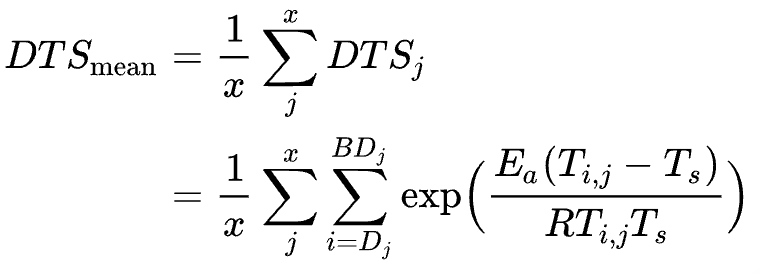

In [26]:
from IPython.display import Image
Image(filename='Image/DTSj Formula.png')

### 溫度高，生長快；溫度低，生長慢

	•T_i,j：第 j 年第 i 天的每日平均氣溫（轉為開爾文）
	•T_s：標準溫度，設為攝氏 17°C，即 290.15 K
	•D_j：第 j 年冬眠結束的日期
	•BD_j：第 j 年的實際開花日
	•DTS_j：標準反應時間

	•DTS：代表某一年，每日的生理累積值
	•DTSj：代表某一年的生理總累積值
	•DTSean：代表全年的平均生理總累積值

### 計算訓練集的 DTS mean

In [29]:
# 將訓練集的 Dj 命名為 train_dj_dict方便下個公式使用
train_dj_dict = dict(zip(train_allyears_dj_days["年"], train_allyears_dj_days["Dj"]))
train_dj_dict

{1961: 39,
 1962: 42,
 1963: 38,
 1964: 40,
 1965: 39,
 1966: 45,
 1967: 42,
 1968: 44,
 1969: 43,
 1970: 39,
 1971: 43,
 1972: 46,
 1973: 45,
 1974: 40,
 1975: 41,
 1976: 45,
 1977: 41,
 1978: 42,
 1979: 51,
 1980: 42,
 1981: 42,
 1982: 45,
 1983: 45,
 1984: 36,
 1985: 41,
 1986: 39,
 1987: 46,
 1988: 45,
 1989: 51,
 1990: 48,
 1991: 47,
 1992: 48,
 1993: 47,
 1994: 44,
 1995: 46,
 1996: 45,
 1997: 50,
 1998: 47,
 1999: 49,
 2000: 48,
 2001: 45,
 2002: 56,
 2003: 44,
 2004: 50,
 2005: 45,
 2006: 46,
 2007: 55,
 2008: 47,
 2009: 50,
 2010: 47,
 2011: 44}

### 從冬眠結束開始到開花日，不同活化能（Ea）下，櫻花每天累加多少生理反應量（DTSj）直到開花

In [31]:
def calculate_dts_all(train, train_dj_dict, ea_range):
    R = 0.00198588
    Ts = 17 + 273.15

    dtsj_per_ea = {}
    dts_mean_per_ea = {}

    for ea in ea_range:
        dts_list = []

        for year in trainyears:
            Dj_day = train_dj_dict[year]

            blossom_row = train[(train["年"] == year) & (train["開花日"] == 1)] # 找出開花日那一個row, 並讀取index
            if blossom_row.empty:
                continue
            blossom_index = blossom_row.index[0]

            base_row = train[(train["年"] == year) & (train["月"] == 1) & (train["日"] == 1)] # 找當年 1 月 1 日哪一個 row
            if base_row.empty:
                continue
            base_index = base_row.index[0]

            start_day = base_index + Dj_day - 1
            if start_day > blossom_index:
                continue

            DTSj = 0
            for i in range(start_day, blossom_index + 1): # 根據平均絕對溫度，計算出冬眠結束日~ 開花日的生理累積值
                T_ij = train.loc[i, "平均氣溫"] + 273.15
                exp_val = np.exp((ea * (T_ij - Ts)) / (R * T_ij * Ts))
                DTSj += exp_val

            dts_list.append(DTSj)

        dtsj_per_ea[ea] = dts_list # 根據不同 Ea下，每年的 DTSj
        dts_mean_per_ea[ea] = np.mean(dts_list) if dts_list else None #這個 Ea下的 全年份的 DTSmean

    return dtsj_per_ea, dts_mean_per_ea

### 找出不同活化能（Ea）下，冬眠結束日到開花所需要累積的總生理反應量DTSj

In [33]:
trainyears = sorted(train_dj_dict.keys())
ea_range = range(5, 41)
dtsj_per_ea, dts_mean_per_ea = calculate_dts_all(train, train_dj_dict, ea_range)

# 分開印出來！
print("▶️ DTSj per Ea")
print(dtsj_per_ea)

▶️ DTSj per Ea
{5: [np.float64(38.90294752046194), np.float64(37.309371114395105), np.float64(39.56829914061329), np.float64(39.1404027525059), np.float64(38.84760353939216), np.float64(27.390533459351005), np.float64(36.11365947837218), np.float64(34.731766881268136), np.float64(40.36284774570576), np.float64(42.69024978114609), np.float64(35.49457292422535), np.float64(32.465370644638966), np.float64(34.85494374090707), np.float64(38.889198694676686), np.float64(34.73366037354689), np.float64(29.35869026037311), np.float64(30.757462657036253), np.float64(36.14456124932306), np.float64(24.77352848615093), np.float64(37.02223353598626), np.float64(32.9458688954516), np.float64(29.413997705417753), np.float64(34.565907981575705), np.float64(46.80563337426903), np.float64(39.49348439766339), np.float64(39.95908078124204), np.float64(27.612773484207697), np.float64(36.19095309556641), np.float64(22.581769152343092), np.float64(26.10668544014615), np.float64(33.314363029167815), np.float64

### 不同活化能（Ea）下，冬眠結束日到開花所需要累積的「平均」總生理反應量 DTSmean

In [35]:
print("\n▶️ DTSmean per Ea")
print(dts_mean_per_ea)


▶️ DTSmean per Ea
{5: np.float64(32.42568881394586), 6: np.float64(30.691088373886533), 7: np.float64(29.061951838442642), 8: np.float64(27.53137254830716), 9: np.float64(26.09292151926747), 10: np.float64(24.740612942228903), 11: np.float64(23.468872267072257), 12: np.float64(22.272506670660263), 13: np.float64(21.146677725174047), 14: np.float64(20.08687609753441), 15: np.float64(19.088898124051887), 16: np.float64(18.14882411675235), 17: np.float64(17.262998269131955), 18: np.float64(16.428010039488385), 19: np.float64(15.640676899530689), 20: np.float64(14.898028344756435), 21: np.float64(14.197291071165845), 22: np.float64(13.535875230315687), 23: np.float64(12.911361681554931), 24: np.float64(12.321490166576957), 25: np.float64(11.764148337215508), 26: np.float64(11.237361572742918), 27: np.float64(10.739283527838463), 28: np.float64(10.268187356914861), 29: np.float64(9.822457564654758), 30: np.float64(9.400582436444271), 31: np.float64(9.001147005924784), 32: np.float64(8.6228

In [36]:
# 只印 Ea=5 的 DTSj
print("▶️ Ea = 5 的 DTSj清單：\n")
for year, dtsj in zip(trainyears, dtsj_per_ea[5]):
    print(f"{year} 年的 DTSj 為 {dtsj:.5f}")

# 再印一行 DTSmean
print("\n▶️ Ea = 5 的 DTSmean 平均值：")
print(f"DTSmean = {dts_mean_per_ea[5]:.5f}")

▶️ Ea = 5 的 DTSj清單：

1961 年的 DTSj 為 38.90295
1962 年的 DTSj 為 37.30937
1963 年的 DTSj 為 39.56830
1964 年的 DTSj 為 39.14040
1965 年的 DTSj 為 38.84760
1966 年的 DTSj 為 27.39053
1967 年的 DTSj 為 36.11366
1968 年的 DTSj 為 34.73177
1969 年的 DTSj 為 40.36285
1970 年的 DTSj 為 42.69025
1971 年的 DTSj 為 35.49457
1972 年的 DTSj 為 32.46537
1973 年的 DTSj 為 34.85494
1974 年的 DTSj 為 38.88920
1975 年的 DTSj 為 34.73366
1976 年的 DTSj 為 29.35869
1977 年的 DTSj 為 30.75746
1978 年的 DTSj 為 36.14456
1979 年的 DTSj 為 24.77353
1980 年的 DTSj 為 37.02223
1981 年的 DTSj 為 32.94587
1982 年的 DTSj 為 29.41400
1983 年的 DTSj 為 34.56591
1984 年的 DTSj 為 46.80563
1985 年的 DTSj 為 39.49348
1986 年的 DTSj 為 39.95908
1987 年的 DTSj 為 27.61277
1988 年的 DTSj 為 36.19095
1989 年的 DTSj 為 22.58177
1990 年的 DTSj 為 26.10669
1991 年的 DTSj 為 33.31436
1992 年的 DTSj 為 28.56483
1993 年的 DTSj 為 28.06685
1994 年的 DTSj 為 35.29433
1995 年的 DTSj 為 34.45993
1996 年的 DTSj 為 35.70668
1997 年的 DTSj 為 24.60915
1998 年的 DTSj 為 30.92126
1999 年的 DTSj 為 27.73178
2000 年的 DTSj 為 32.61043
2001 年的 DTSj 為 29.5

### 黑線為 Ea 從5到40的訓練集全年度 DTS 平均值
### 紅線為 Ea 從5到40的訓練集全年度 DTS 平均值的總平均

/var/folders/dz/rm4p0lbd3ls5944_nc31vh1h0000gn/T/ipykernel_5728/2668545264.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot(all_ea, avg_dts_mean_line, "-mo", label="DTSmean over all Ea", color='lightpink')


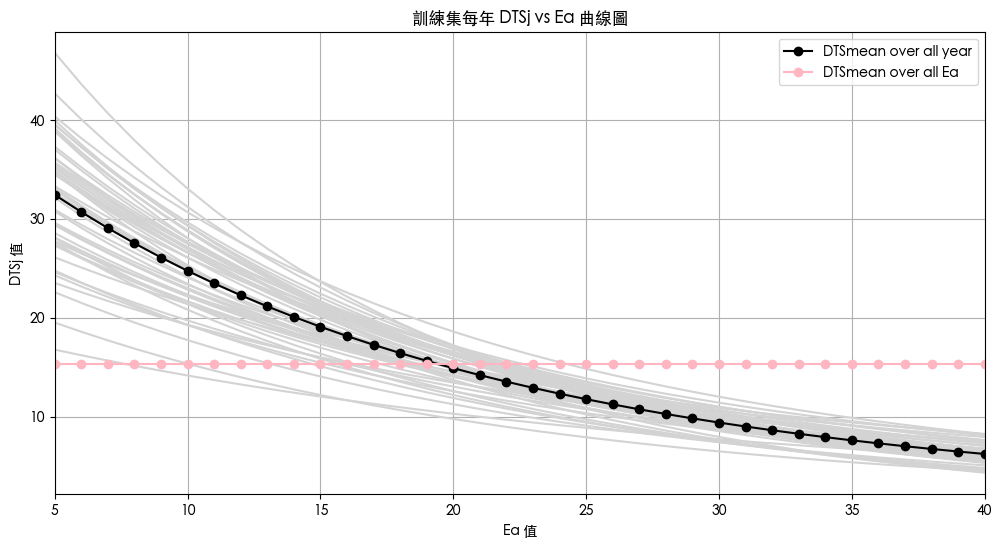

In [38]:
all_ea = list(dtsj_per_ea.keys())

# 整理成 dtsj_for_each_year[i][j] = 第 i 年對應第 j 個 Ea 的 DTS
dtsj_for_each_year = []
for i in range(len(trainyears)):
    yearly_dts = []
    for ea in all_ea:
        try:
            yearly_dts.append(dtsj_per_ea[ea][i])
        except IndexError:
            yearly_dts.append(None)
    dtsj_for_each_year.append(yearly_dts)

# 計算平均 DTSmean
dts_mean_list = list(dts_mean_per_ea.values())
avg_dts_mean = np.nanmean([val for val in dts_mean_list if val is not None])
avg_dts_mean_line = [avg_dts_mean] * len(all_ea)

# 畫圖
plt.figure(figsize=(12, 6))

# 畫每年的 DTS vs Ea 曲線，不加 label
for i in range(len(trainyears)):
    plt.plot(all_ea, dtsj_for_each_year[i], color='lightgray')  # 或 alpha=0.5

# 畫 DTSmean 線（黑色點）
plt.plot(all_ea, dts_mean_list, "-ko", label="DTSmean over all year")

# 畫 DTSmean over all Ea 的橫線（粉紅線）
plt.plot(all_ea, avg_dts_mean_line, "-mo", label="DTSmean over all Ea", color='lightpink')

# 加圖例，只會顯示上面這兩條線
plt.xlabel("Ea 值")
plt.ylabel("DTSj 值")
plt.title("訓練集每年 DTSj vs Ea 曲線圖")
plt.xlim(min(all_ea), max(all_ea))
plt.grid(True)
plt.legend()  # 只會顯示你有設定 label 的線條
plt.savefig('訓練集每年 DTSj vs Ea 曲線圖', dpi=300, bbox_inches='tight')
plt.show()

### 活化能 Ea 越小，櫻花開花所需時間(DTS大)越久（反應越慢）。

In [40]:
print("Ea值 對應 平均DTSmean：")
for ea, mean_dts in zip(all_ea, dts_mean_list):
    if mean_dts is not None:
        print(f"Ea = {ea:2d}，全年平均 DTSmean = {mean_dts}")
    else:
        print(f"Ea = {ea:2d}，沒有資料")

print()
print(mean_dts.mean)

Ea值 對應 平均DTSmean：
Ea =  5，全年平均 DTSmean = 32.42568881394586
Ea =  6，全年平均 DTSmean = 30.691088373886533
Ea =  7，全年平均 DTSmean = 29.061951838442642
Ea =  8，全年平均 DTSmean = 27.53137254830716
Ea =  9，全年平均 DTSmean = 26.09292151926747
Ea = 10，全年平均 DTSmean = 24.740612942228903
Ea = 11，全年平均 DTSmean = 23.468872267072257
Ea = 12，全年平均 DTSmean = 22.272506670660263
Ea = 13，全年平均 DTSmean = 21.146677725174047
Ea = 14，全年平均 DTSmean = 20.08687609753441
Ea = 15，全年平均 DTSmean = 19.088898124051887
Ea = 16，全年平均 DTSmean = 18.14882411675235
Ea = 17，全年平均 DTSmean = 17.262998269131955
Ea = 18，全年平均 DTSmean = 16.428010039488385
Ea = 19，全年平均 DTSmean = 15.640676899530689
Ea = 20，全年平均 DTSmean = 14.898028344756435
Ea = 21，全年平均 DTSmean = 14.197291071165845
Ea = 22，全年平均 DTSmean = 13.535875230315687
Ea = 23，全年平均 DTSmean = 12.911361681554931
Ea = 24，全年平均 DTSmean = 12.321490166576957
Ea = 25，全年平均 DTSmean = 11.764148337215508
Ea = 26，全年平均 DTSmean = 11.237361572742918
Ea = 27，全年平均 DTSmean = 10.739283527838463
Ea = 28，全年平均 DTSmean 

In [41]:
print(f'在所有年份測試的 所有Ea活化能數值中（5-40） ，DTSmean的值為：{avg_dts_mean}')

在所有年份測試的 所有Ea活化能數值中（5-40） ，DTSmean的值為：15.286928827809199


### 接下來要比較
### 「冬眠結束到實際開花日日數」
### 「冬眠結束日開始，使用 DTSj 累加到不同 Ea 下的 DTSmean 推算出直到預測的開花日日數」
#### 具體目標：
	•冬眠結束日起算，每天去累積生理值（DTSj）
	•一直累積到開花日，這段的 DTSj
	•然後比較這個「實際」開花日 DTSj值（當年）和「預測」不同 Ea下 的 DTSmean
	•看看「實際值」跟「平均值」的 loss 是多少

	•步驟 1：根據 DTSmean 和 DTSj，推回去「預測開花日」
	•步驟 2：把「預測開花日」跟「真實開花日」做 Loss 計算
	•步驟 3：找出 Loss 最小的那個 Ea，當成最佳 Ea

#### 訓練集的 Dj：train_dj_dict
#### 取得年份列表 years = sorted(train_dj_dict.keys())
#### 訓練集的 DTSmean：avg_dts_mean

### 從訓練集資料中，找每一年開花的那天，回傳每年的實際開花日（第幾天）

In [45]:
def get_actual_bloom_days(train):
    actual_bloom_days = []
    
    for year in trainyears:
        # 找這一年的開花日
        blossom_row = train[(train["年"] == year) & (train["開花日"] == 1)]
        
        if blossom_row.empty:
            # 如果這年沒有資料，就跳過
            continue
        
        month = int(blossom_row["月"].values[0])
        day = int(blossom_row["日"].values[0])
        
        # 計算這一天是那一年的第幾天
        base_date = datetime.date(year, 1, 1)
        bloom_date = datetime.date(year, month, day)
        actual_day = (bloom_date - base_date).days + 1
        
        actual_bloom_days.append(actual_day)

    return trainyears, actual_bloom_days

In [46]:
trainyears, actual_bloom_days = get_actual_bloom_days(train)

for year, bloom_day in zip(trainyears, actual_bloom_days):
    print(f'{year}年的開花日是第{bloom_day}天')

1961年的開花日是第91天
1962年的開花日是第91天
1963年的開花日是第91天
1964年的開花日是第93天
1965年的開花日是第92天
1966年的開花日是第79天
1967年的開花日是第89天
1968年的開花日是第89天
1969年的開花日是第96天
1970年的開花日是第97天
1971年的開花日是第89天
1972年的開花日是第88天
1973年的開花日是第90天
1974年的開花日是第92天
1975年的開花日是第88天
1976年的開花日是第82天
1977年的開花日是第81天
1978年的開花日是第90天
1979年的開花日是第82天
1980年的開花日是第91天
1981年的開花日是第85天
1982年的開花日是第82天
1983年的開花日是第90天
1984年的開花日是第102天
1985年的開花日是第93天
1986年的開花日是第93天
1987年的開花日是第82天
1988年的開花日是第93天
1989年的開花日是第79天
1990年的開花日是第79天
1991年的開花日是第89天
1992年的開花日是第84天
1993年的開花日是第83天
1994年的開花日是第90天
1995年的開花日是第90天
1996年的開花日是第91天
1997年的開花日是第80天
1998年的開花日是第86天
1999年的開花日是第83天
2000年的開花日是第90天
2001年的開花日是第82天
2002年的開花日是第75天
2003年的開花日是第86天
2004年的開花日是第78天
2005年的開花日是第90天
2006年的開花日是第80天
2007年的開花日是第79天
2008年的開花日是第82天
2009年的開花日是第80天
2010年的開花日是第81天
2011年的開花日是第87天


### 以活化能（Ea）=20為例，先計算出需要累積的總生理反應量，再根據訓練集全年度算出需累加多少天至總生理反應量後才會開花

In [48]:
# 先假設你要選的 Ea
chosen_ea = 20  # 你可以換成想要的值
dts_mean = dts_mean_per_ea[chosen_ea]  # 找這個 Ea 對應的 DTSmean

# 儲存結果
results = []

# 針對每一年做處理
for index, row in train_allyears_dj_days.iterrows():
    year = row['年']
    wake_up_date = row['冬眠結束日']  # 這是冬眠結束日，格式是datetime.date

    # 找當年開花日
    blossom_row = train[(train['年'] == year) & (train['開花日'] == 1)]
    if blossom_row.empty:
        continue
    blossom_index = blossom_row.index[0]
    blossom_date = datetime.date(
        train.loc[blossom_index, '年'],
        train.loc[blossom_index, '月'],
        train.loc[blossom_index, '日']
    )

    # 初始化
    accumulated_DTS = 0
    day_counter = 0

    # 每天累積，直到超過 DTSmean
    while accumulated_DTS <= dts_mean:
        current_date = wake_up_date + datetime.timedelta(days=day_counter)

        # 找當天資料
        temp_row = train[
            (train['年'] == current_date.year) &
            (train['月'] == current_date.month) &
            (train['日'] == current_date.day)
        ]

        if temp_row.empty:
            break  # 如果找不到資料，跳出

        avg_temp = temp_row['平均氣溫'].values[0] + 273.15  # 轉成絕對溫度
        R = 0.00198588
        Ts = 17 + 273.15
        exp_val = np.exp((chosen_ea * (avg_temp - Ts)) / (R * avg_temp * Ts))
        accumulated_DTS += exp_val

        day_counter += 1

    # 計算實際開花距離冬眠結束幾天
    actual_days = (blossom_date - wake_up_date).days

    results.append({
        '年': year,
        '推估天數': day_counter,
        '實際天數': actual_days,
        '推估與實際差距': day_counter - actual_days
    })

# 轉成 DataFrame 看結果
results_df = pd.DataFrame(results)
print(results_df)

       年  推估天數  實際天數  推估與實際差距
0   1961    51    52       -1
1   1962    47    49       -2
2   1963    52    53       -1
3   1964    53    53        0
4   1965    55    53        2
5   1966    38    34        4
6   1967    45    47       -2
7   1968    44    45       -1
8   1969    47    53       -6
9   1970    54    58       -4
10  1971    46    46        0
11  1972    43    42        1
12  1973    45    45        0
13  1974    51    52       -1
14  1975    51    47        4
15  1976    41    37        4
16  1977    43    40        3
17  1978    48    48        0
18  1979    38    31        7
19  1980    49    49        0
20  1981    45    43        2
21  1982    39    37        2
22  1983    46    45        1
23  1984    62    66       -4
24  1985    49    52       -3
25  1986    53    54       -1
26  1987    43    36        7
27  1988    48    48        0
28  1989    39    28       11
29  1990    33    31        2
30  1991    40    42       -2
31  1992    39    36        3
32  1993  

### 找出訓練集中活化能（Ea）在多少的條件下，才能夠預測出實際開花所需日數最相近的日數
### 以 MSE 作為實際與預測的差距評估

🌸 最佳 Ea: 26，對應的 MSE: 10.8431，DTSmean: 11.2374


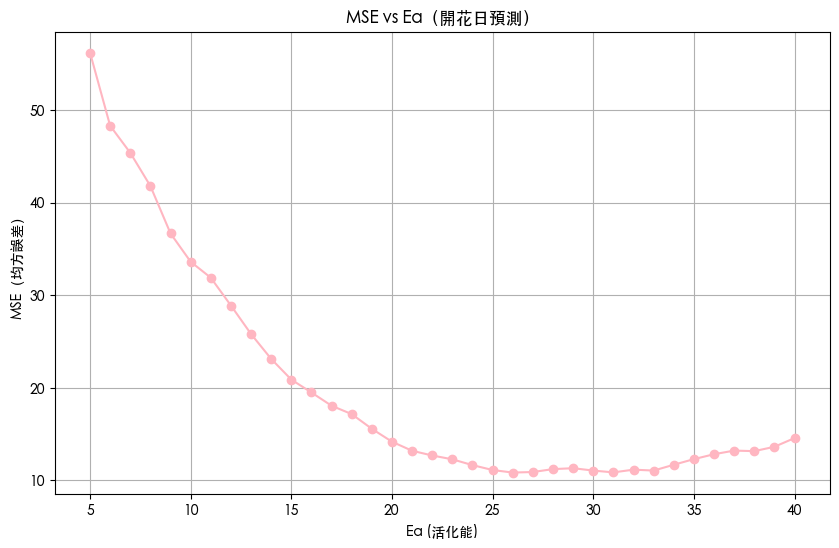

In [50]:
# 預先定義常數
R = 0.00198588
Ts = 17 + 273.15  # 常數溫度 (17°C 轉成 Kelvin)

# 準備儲存結果
bloom_days_per_ea = []  # 每個 Ea 的推估開花天數
actual_bloom_days = []  # 真實開花天數

# 把氣溫轉成 Kelvin
train['avg_temp_kelvin'] = train['平均氣溫'] + 273.15

# 開始針對每個 Ea 處理
for ea in ea_range:
    bloom_days_by_DTSmean = []

    for idx, row in train_allyears_dj_days.iterrows():
        year = row['年']
        wake_up_date = row['冬眠結束日']

        # 找到該年冬眠結束日的位置
        start_row = train[
            (train['年'] == wake_up_date.year) &
            (train['月'] == wake_up_date.month) &
            (train['日'] == wake_up_date.day)
        ]
        if start_row.empty:
            continue

        start_idx = start_row.index[0]  # 取得index
        accumulated_DTS = 0
        current_idx = start_idx

        # 不斷累加直到達到 DTSmean
        while accumulated_DTS <= dts_mean_per_ea[ea]:
            if current_idx >= len(train):
                break
        
            temp_kelvin = train.loc[current_idx, 'avg_temp_kelvin']
            exp_val = np.exp((ea * (temp_kelvin - Ts)) / (temp_kelvin * Ts * R))
            accumulated_DTS += exp_val
        
            current_idx += 1
        
        bloom_idx = current_idx

        # 冬眠結束日
        margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

        # 預測開花日
        estimated_bloom_date = datetime.date(
            train.loc[bloom_idx, '年'],
            train.loc[bloom_idx, '月'],
            train.loc[bloom_idx, '日']
        )

        # 推估天數
        bloom_duration = (estimated_bloom_date - margin_date).days
        bloom_days_by_DTSmean.append(bloom_duration)

    bloom_days_per_ea.append(bloom_days_by_DTSmean)

# ----------------------------
# 再來處理真實的開花日
for idx, row in train_allyears_dj_days.iterrows():
    year = row['年']
    wake_up_date = row['冬眠結束日']

    margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

    # 找實際開花日
    blossom_row = train[(train['年'] == year) & (train['開花日'] == 1)]
    if blossom_row.empty:
        continue

    blossom_idx = blossom_row.index[0]
    blossom_date = datetime.date(
        train.loc[blossom_idx, '年'],
        train.loc[blossom_idx, '月'],
        train.loc[blossom_idx, '日']
    )

    bloom_duration = (blossom_date - margin_date).days
    actual_bloom_days.append(bloom_duration)

# ----------------------------
# 計算每個 Ea 的 MSE
mse_per_ea = []

for i in range(len(ea_range)):
    squared_errors = []
    for j in range(len(actual_bloom_days)):
        error = bloom_days_per_ea[i][j] - actual_bloom_days[j]
        squared_errors.append(error ** 2)
    mse = np.mean(squared_errors)
    mse_per_ea.append(mse)

# ----------------------------
# 找到最小的 MSE
min_error = np.min(mse_per_ea)
best_idx = np.argmin(mse_per_ea)
best_ea = ea_range[best_idx]
best_dtsm = dts_mean_per_ea[best_ea]

print(f"🌸 最佳 Ea: {best_ea}，對應的 MSE: {min_error:.4f}，DTSmean: {best_dtsm:.4f}")

# ----------------------------
# 畫圖
plt.figure(figsize=(10,6))
plt.plot(ea_range, mse_per_ea, marker='o', color='lightpink')
plt.xlabel('Ea (活化能)')
plt.ylabel('MSE（均方誤差）')
plt.title('MSE vs Ea（開花日預測）')
plt.grid(True)
plt.savefig('MSE vs Ea（開花日預測）', dpi=300, bbox_inches='tight')
plt.show()

### 找出訓練集中活化能（Ea）在多少的條件下，才能夠預測出實際開花所需日數最相近的日數
### 以 RMSE 作為實際與預測的差距評估

🌸 最佳 Ea: 26，對應的 RMSE: 3.2929，DTSmean: 11.2374


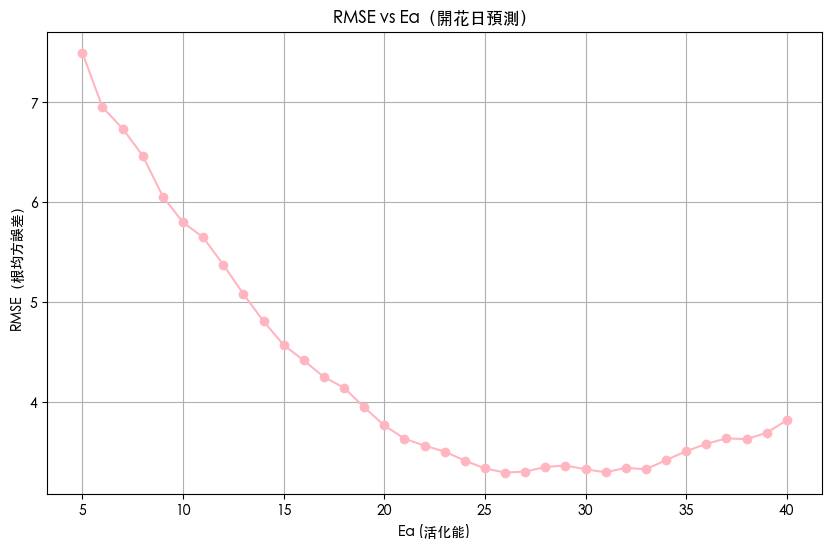

In [52]:
# 預先定義常數
R = 0.00198588
Ts = 17 + 273.15  # 常數溫度 (17°C 轉成 Kelvin)

# 準備儲存結果
bloom_days_per_ea = []  # 每個 Ea 的推估開花天數
actual_bloom_days = []  # 真實開花天數

# 把氣溫轉成 Kelvin
train['avg_temp_kelvin'] = train['平均氣溫'] + 273.15

# 開始針對每個 Ea 處理
for ea in ea_range:
    bloom_days_by_DTSmean = []

    for idx, row in train_allyears_dj_days.iterrows():
        year = row['年']
        wake_up_date = row['冬眠結束日']

        # 找到該年冬眠結束日的位置
        start_row = train[
            (train['年'] == wake_up_date.year) &
            (train['月'] == wake_up_date.month) &
            (train['日'] == wake_up_date.day)
        ]
        if start_row.empty:
            continue

        start_idx = start_row.index[0]  # 取得index
        accumulated_DTS = 0
        current_idx = start_idx

        # 不斷累加直到達到 DTSmean
        while accumulated_DTS <= dts_mean_per_ea[ea]:
            if current_idx >= len(train):
                break
        
            temp_kelvin = train.loc[current_idx, 'avg_temp_kelvin']
            exp_val = np.exp((ea * (temp_kelvin - Ts)) / (temp_kelvin * Ts * R))
            accumulated_DTS += exp_val
        
            current_idx += 1
        
        bloom_idx = current_idx

        # 冬眠結束日
        margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

        # 預測開花日
        estimated_bloom_date = datetime.date(
            train.loc[bloom_idx, '年'],
            train.loc[bloom_idx, '月'],
            train.loc[bloom_idx, '日']
        )

        # 推估天數
        bloom_duration = (estimated_bloom_date - margin_date).days
        bloom_days_by_DTSmean.append(bloom_duration)

    bloom_days_per_ea.append(bloom_days_by_DTSmean)

# ----------------------------
# 再來處理真實的開花日
for idx, row in train_allyears_dj_days.iterrows():
    year = row['年']
    wake_up_date = row['冬眠結束日']

    margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

    # 找實際開花日
    blossom_row = train[(train['年'] == year) & (train['開花日'] == 1)]
    if blossom_row.empty:
        continue

    blossom_idx = blossom_row.index[0]
    blossom_date = datetime.date(
        train.loc[blossom_idx, '年'],
        train.loc[blossom_idx, '月'],
        train.loc[blossom_idx, '日']
    )

    bloom_duration = (blossom_date - margin_date).days
    actual_bloom_days.append(bloom_duration)

# ----------------------------
# 計算每個 Ea 的 RMSE
rmse_per_ea = []  # ✅ 改變變數名稱

for i in range(len(ea_range)):
    squared_errors = []
    for j in range(len(actual_bloom_days)):
        error = bloom_days_per_ea[i][j] - actual_bloom_days[j]
        squared_errors.append(error ** 2)
    rmse = np.sqrt(np.mean(squared_errors))  # ✅ 這裡改成 RMSE 計算
    rmse_per_ea.append(rmse)

# ----------------------------
# 找到最小的 RMSE
min_error = np.min(rmse_per_ea)
best_idx = np.argmin(rmse_per_ea)
best_ea = ea_range[best_idx]
best_dtsm = dts_mean_per_ea[best_ea]

print(f"🌸 最佳 Ea: {best_ea}，對應的 RMSE: {min_error:.4f}，DTSmean: {best_dtsm:.4f}")  # ✅ 這裡改顯示 RMSE

# ----------------------------
# 畫圖
plt.figure(figsize=(10,6))
plt.plot(ea_range, rmse_per_ea, marker='o', color='lightpink')  # ✅ 改使用 rmse_per_ea
plt.xlabel('Ea (活化能)')
plt.ylabel('RMSE（根均方誤差）')  # ✅ 修改標籤
plt.title('RMSE vs Ea（開花日預測）')  # ✅ 修改標題
plt.grid(True)
plt.savefig('RMSE vs Ea（開花日預測）', dpi=300, bbox_inches='tight')  # ✅ 修改檔名
plt.show()

### 列印出所有活化能（Ea）下的 DTSmean，實際與預測之差距

In [54]:
# 整理成 DataFrame
ea_info = pd.DataFrame({
    'Ea': ea_range,
    'DTSmean': [dts_mean_per_ea[ea] for ea in ea_range],
    'RMSE': rmse_per_ea
})

# 顯示結果
print(ea_info)

    Ea    DTSmean      RMSE
0    5  32.425689  7.496404
1    6  30.691088  6.949397
2    7  29.061952  6.735915
3    8  27.531373  6.464079
4    9  26.092922  6.055301
5   10  24.740613  5.797227
6   11  23.468872  5.646446
7   12  22.272507  5.374230
8   13  21.146678  5.079756
9   14  20.086876  4.808081
10  15  19.088898  4.569721
11  16  18.148824  4.414770
12  17  17.262998  4.249567
13  18  16.428010  4.142084
14  19  15.640677  3.945710
15  20  14.898028  3.765165
16  21  14.197291  3.632641
17  22  13.535875  3.561780
18  23  12.911362  3.503500
19  24  12.321490  3.412779
20  25  11.764148  3.334314
21  26  11.237362  3.292892
22  27  10.739284  3.301812
23  28  10.268187  3.348983
24  29   9.822458  3.363588
25  30   9.400582  3.325481
26  31   9.001147  3.295868
27  32   8.622827  3.340189
28  33   8.264380  3.325481
29  34   7.924646  3.418519
30  35   7.602536  3.506297
31  36   7.297028  3.580996
32  37   7.007166  3.635339
33  38   6.732054  3.627239
34  39   6.470849  3

### 列印出實際與預測所需的日數

In [56]:
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[best_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[best_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 53, 實際天數 = 52, 誤差 = 1
Year 1962: 推估天數 = 48, 實際天數 = 49, 誤差 = -1
Year 1963: 推估天數 = 53, 實際天數 = 53, 誤差 = 0
Year 1964: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1965: 推估天數 = 59, 實際天數 = 53, 誤差 = 6
Year 1966: 推估天數 = 37, 實際天數 = 34, 誤差 = 3
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 43, 實際天數 = 45, 誤差 = -2
Year 1969: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1970: 推估天數 = 58, 實際天數 = 58, 誤差 = 0
Year 1971: 推估天數 = 46, 實際天數 = 46, 誤差 = 0
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 45, 實際天數 = 45, 誤差 = 0
Year 1974: 推估天數 = 52, 實際天數 = 52, 誤差 = 0
Year 1975: 推估天數 = 53, 實際天數 = 47, 誤差 = 6
Year 1976: 推估天數 = 41, 實際天數 = 37, 誤差 = 4
Year 1977: 推估天數 = 43, 實際天數 = 40, 誤差 = 3
Year 1978: 推估天數 = 50, 實際天數 = 48, 誤差 = 2
Year 1979: 推估天數 = 37, 實際天數 = 31, 誤差 = 6
Year 1980: 推估天數 = 50, 實際天數 = 49, 誤差 = 1
Year 1981: 推估天數 = 45, 實際天數 = 43, 誤差 = 2
Year 1982: 推估天數 = 39, 實際天數 = 37, 誤差 = 2
Year 1983: 推估天數 = 47, 實際天數 = 45, 誤差 = 2
Year 1984: 推估天數 = 66, 實際天數 = 66, 誤差 = 0
Year 1985: 推估天數 = 51, 實際天數 = 52, 誤差 

In [57]:
# 找到 Ea=26 在 ea_range 中的位置
target_ea = 26
target_idx = ea_range.index(target_ea)  # 找到Ea=20是第幾個

# 查看 Ea=20 的推估 vs 真實結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 53, 實際天數 = 52, 誤差 = 1
Year 1962: 推估天數 = 48, 實際天數 = 49, 誤差 = -1
Year 1963: 推估天數 = 53, 實際天數 = 53, 誤差 = 0
Year 1964: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1965: 推估天數 = 59, 實際天數 = 53, 誤差 = 6
Year 1966: 推估天數 = 37, 實際天數 = 34, 誤差 = 3
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 43, 實際天數 = 45, 誤差 = -2
Year 1969: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1970: 推估天數 = 58, 實際天數 = 58, 誤差 = 0
Year 1971: 推估天數 = 46, 實際天數 = 46, 誤差 = 0
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 45, 實際天數 = 45, 誤差 = 0
Year 1974: 推估天數 = 52, 實際天數 = 52, 誤差 = 0
Year 1975: 推估天數 = 53, 實際天數 = 47, 誤差 = 6
Year 1976: 推估天數 = 41, 實際天數 = 37, 誤差 = 4
Year 1977: 推估天數 = 43, 實際天數 = 40, 誤差 = 3
Year 1978: 推估天數 = 50, 實際天數 = 48, 誤差 = 2
Year 1979: 推估天數 = 37, 實際天數 = 31, 誤差 = 6
Year 1980: 推估天數 = 50, 實際天數 = 49, 誤差 = 1
Year 1981: 推估天數 = 45, 實際天數 = 43, 誤差 = 2
Year 1982: 推估天數 = 39, 實際天數 = 37, 誤差 = 2
Year 1983: 推估天數 = 47, 實際天數 = 45, 誤差 = 2
Year 1984: 推估天數 = 66, 實際天數 = 66, 誤差 = 0
Year 1985: 推估天數 = 51, 實際天數 = 52, 誤差 

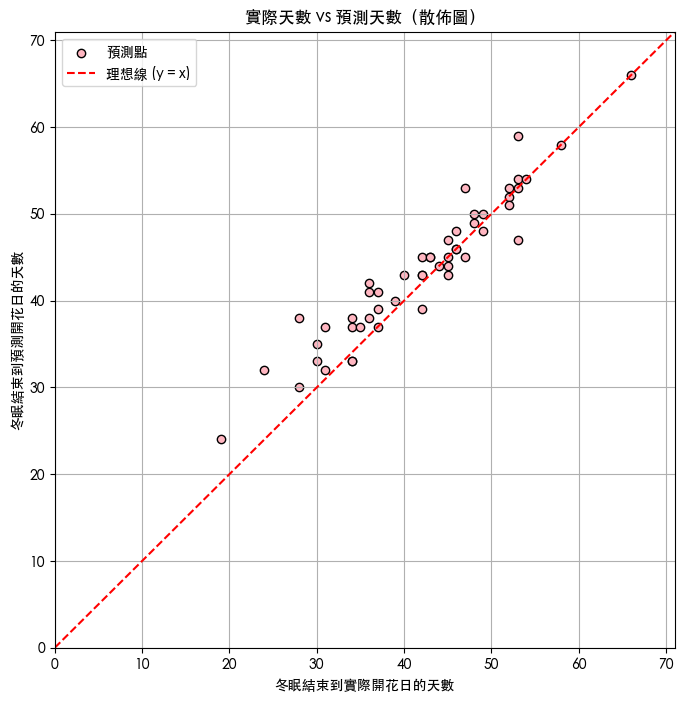

In [58]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('真實天數 vs 預測天數（E=27）', dpi=300, bbox_inches='tight')
plt.show()

### 列印出各個活化能（Ea）= 5, 10, 15, 20, 30, 25, 40，實際與預測之差距

In [60]:
# 找到 Ea=5 在 ea_range 中的位置
target_ea = 5
target_idx = ea_range.index(target_ea)  # 找到Ea=5是第幾個

# 查看 Ea=5 的推估 vs 實際結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 45, 實際天數 = 52, 誤差 = -7
Year 1962: 推估天數 = 44, 實際天數 = 49, 誤差 = -5
Year 1963: 推估天數 = 46, 實際天數 = 53, 誤差 = -7
Year 1964: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1965: 推估天數 = 46, 實際天數 = 53, 誤差 = -7
Year 1966: 推估天數 = 42, 實際天數 = 34, 誤差 = 8
Year 1967: 推估天數 = 44, 實際天數 = 47, 誤差 = -3
Year 1968: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1969: 推估天數 = 45, 實際天數 = 53, 誤差 = -8
Year 1970: 推估天數 = 47, 實際天數 = 58, 誤差 = -11
Year 1971: 推估天數 = 44, 實際天數 = 46, 誤差 = -2
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1974: 推估天數 = 45, 實際天數 = 52, 誤差 = -7
Year 1975: 推估天數 = 46, 實際天數 = 47, 誤差 = -1
Year 1976: 推估天數 = 43, 實際天數 = 37, 誤差 = 6
Year 1977: 推估天數 = 43, 實際天數 = 40, 誤差 = 3
Year 1978: 推估天數 = 45, 實際天數 = 48, 誤差 = -3
Year 1979: 推估天數 = 41, 實際天數 = 31, 誤差 = 10
Year 1980: 推估天數 = 45, 實際天數 = 49, 誤差 = -4
Year 1981: 推估天數 = 44, 實際天數 = 43, 誤差 = 1
Year 1982: 推估天數 = 42, 實際天數 = 37, 誤差 = 5
Year 1983: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1984: 推估天數 = 49, 實際天數 = 66, 誤差 = -17
Year 1985: 推估天數 = 45

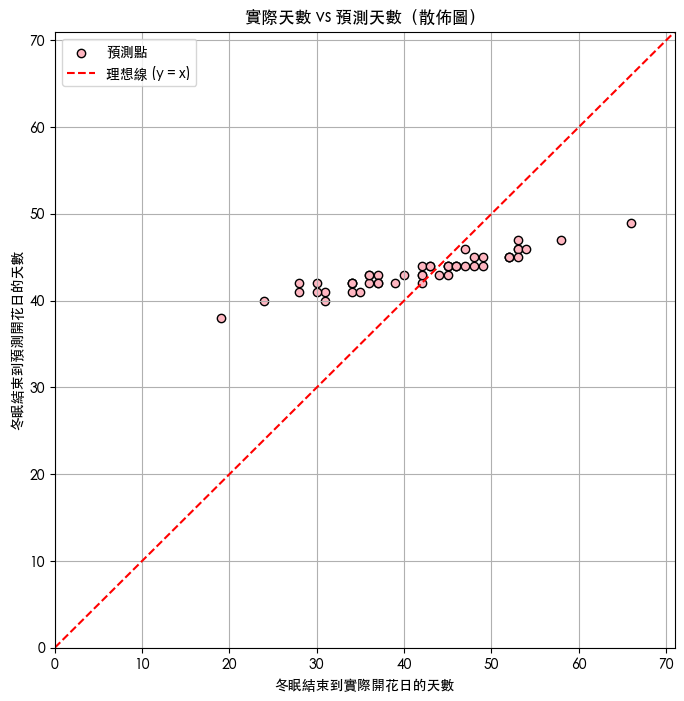

In [61]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('實際天數 vs 預測天數（E=5）', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# 找到 Ea=10 在 ea_range 中的位置
target_ea = 10
target_idx = ea_range.index(target_ea)  # 找到Ea=5是第幾個

# 查看 Ea=10 的推估 vs 實際結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 47, 實際天數 = 52, 誤差 = -5
Year 1962: 推估天數 = 45, 實際天數 = 49, 誤差 = -4
Year 1963: 推估天數 = 49, 實際天數 = 53, 誤差 = -4
Year 1964: 推估天數 = 50, 實際天數 = 53, 誤差 = -3
Year 1965: 推估天數 = 49, 實際天數 = 53, 誤差 = -4
Year 1966: 推估天數 = 40, 實際天數 = 34, 誤差 = 6
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1969: 推估天數 = 46, 實際天數 = 53, 誤差 = -7
Year 1970: 推估天數 = 50, 實際天數 = 58, 誤差 = -8
Year 1971: 推估天數 = 45, 實際天數 = 46, 誤差 = -1
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1974: 推估天數 = 48, 實際天數 = 52, 誤差 = -4
Year 1975: 推估天數 = 48, 實際天數 = 47, 誤差 = 1
Year 1976: 推估天數 = 42, 實際天數 = 37, 誤差 = 5
Year 1977: 推估天數 = 43, 實際天數 = 40, 誤差 = 3
Year 1978: 推估天數 = 46, 實際天數 = 48, 誤差 = -2
Year 1979: 推估天數 = 39, 實際天數 = 31, 誤差 = 8
Year 1980: 推估天數 = 47, 實際天數 = 49, 誤差 = -2
Year 1981: 推估天數 = 44, 實際天數 = 43, 誤差 = 1
Year 1982: 推估天數 = 41, 實際天數 = 37, 誤差 = 4
Year 1983: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1984: 推估天數 = 55, 實際天數 = 66, 誤差 = -11
Year 1985: 推估天數 = 46, 實

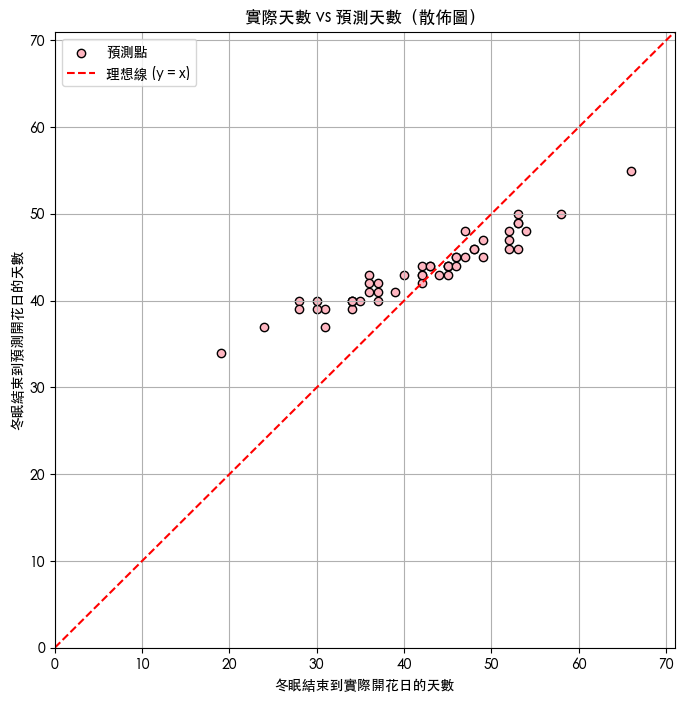

In [63]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('實際天數 vs 預測天數（E=10）', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
# 找到 Ea=15 在 ea_range 中的位置
target_ea = 15
target_idx = ea_range.index(target_ea)  # 找到Ea=15是第幾個

# 查看 Ea=15 的推估 vs 實際結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 50, 實際天數 = 52, 誤差 = -2
Year 1962: 推估天數 = 46, 實際天數 = 49, 誤差 = -3
Year 1963: 推估天數 = 50, 實際天數 = 53, 誤差 = -3
Year 1964: 推估天數 = 52, 實際天數 = 53, 誤差 = -1
Year 1965: 推估天數 = 52, 實際天數 = 53, 誤差 = -1
Year 1966: 推估天數 = 39, 實際天數 = 34, 誤差 = 5
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1969: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1970: 推估天數 = 52, 實際天數 = 58, 誤差 = -6
Year 1971: 推估天數 = 45, 實際天數 = 46, 誤差 = -1
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 45, 實際天數 = 45, 誤差 = 0
Year 1974: 推估天數 = 50, 實際天數 = 52, 誤差 = -2
Year 1975: 推估天數 = 49, 實際天數 = 47, 誤差 = 2
Year 1976: 推估天數 = 41, 實際天數 = 37, 誤差 = 4
Year 1977: 推估天數 = 43, 實際天數 = 40, 誤差 = 3
Year 1978: 推估天數 = 47, 實際天數 = 48, 誤差 = -1
Year 1979: 推估天數 = 38, 實際天數 = 31, 誤差 = 7
Year 1980: 推估天數 = 48, 實際天數 = 49, 誤差 = -1
Year 1981: 推估天數 = 44, 實際天數 = 43, 誤差 = 1
Year 1982: 推估天數 = 40, 實際天數 = 37, 誤差 = 3
Year 1983: 推估天數 = 45, 實際天數 = 45, 誤差 = 0
Year 1984: 推估天數 = 60, 實際天數 = 66, 誤差 = -6
Year 1985: 推估天數 = 48, 實際天數

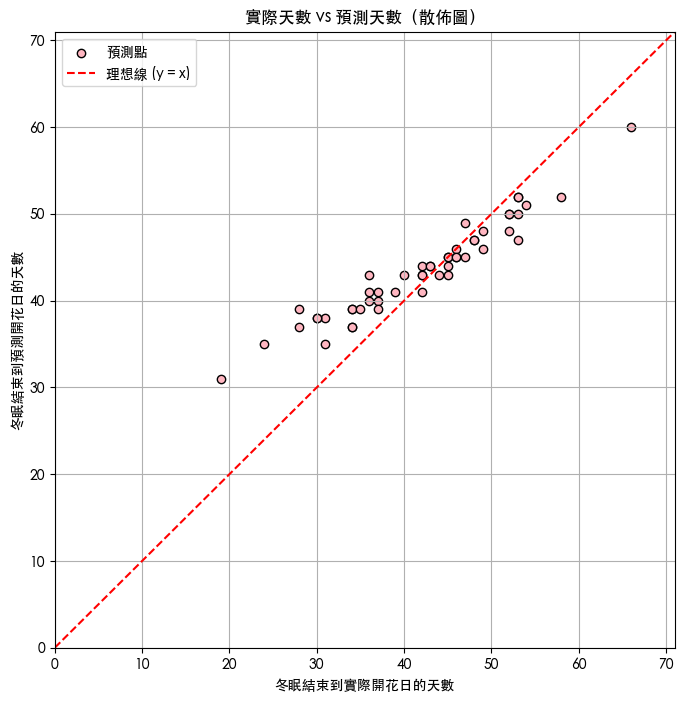

In [65]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('實際天數 vs 預測天數（E=15）', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
# 找到 Ea=20 在 ea_range 中的位置
target_ea = 20
target_idx = ea_range.index(target_ea)  # 找到Ea=15是第幾個

# 查看 Ea=20 的推估 vs 實際結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 51, 實際天數 = 52, 誤差 = -1
Year 1962: 推估天數 = 47, 實際天數 = 49, 誤差 = -2
Year 1963: 推估天數 = 52, 實際天數 = 53, 誤差 = -1
Year 1964: 推估天數 = 53, 實際天數 = 53, 誤差 = 0
Year 1965: 推估天數 = 55, 實際天數 = 53, 誤差 = 2
Year 1966: 推估天數 = 38, 實際天數 = 34, 誤差 = 4
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 44, 實際天數 = 45, 誤差 = -1
Year 1969: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1970: 推估天數 = 54, 實際天數 = 58, 誤差 = -4
Year 1971: 推估天數 = 46, 實際天數 = 46, 誤差 = 0
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 45, 實際天數 = 45, 誤差 = 0
Year 1974: 推估天數 = 51, 實際天數 = 52, 誤差 = -1
Year 1975: 推估天數 = 51, 實際天數 = 47, 誤差 = 4
Year 1976: 推估天數 = 41, 實際天數 = 37, 誤差 = 4
Year 1977: 推估天數 = 43, 實際天數 = 40, 誤差 = 3
Year 1978: 推估天數 = 48, 實際天數 = 48, 誤差 = 0
Year 1979: 推估天數 = 38, 實際天數 = 31, 誤差 = 7
Year 1980: 推估天數 = 49, 實際天數 = 49, 誤差 = 0
Year 1981: 推估天數 = 45, 實際天數 = 43, 誤差 = 2
Year 1982: 推估天數 = 39, 實際天數 = 37, 誤差 = 2
Year 1983: 推估天數 = 46, 實際天數 = 45, 誤差 = 1
Year 1984: 推估天數 = 62, 實際天數 = 66, 誤差 = -4
Year 1985: 推估天數 = 49, 實際天數 = 52

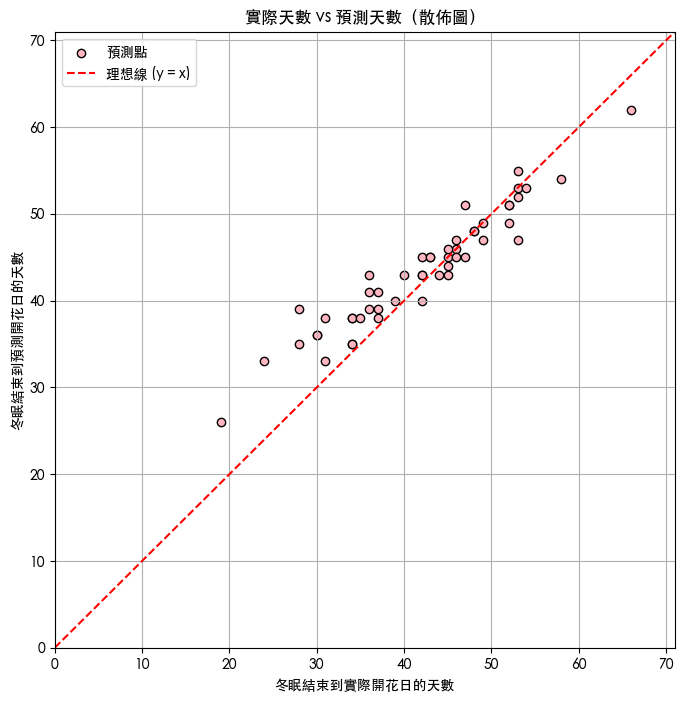

In [67]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('實際天數 vs 預測天數（E=20）', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
# 找到 Ea=30 在 ea_range 中的位置
target_ea = 30
target_idx = ea_range.index(target_ea)  # 找到Ea=40是第幾個

# 查看 Ea=30 的推估 vs 真實結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 53, 實際天數 = 52, 誤差 = 1
Year 1962: 推估天數 = 50, 實際天數 = 49, 誤差 = 1
Year 1963: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1964: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1965: 推估天數 = 60, 實際天數 = 53, 誤差 = 7
Year 1966: 推估天數 = 35, 實際天數 = 34, 誤差 = 1
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 43, 實際天數 = 45, 誤差 = -2
Year 1969: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1970: 推估天數 = 59, 實際天數 = 58, 誤差 = 1
Year 1971: 推估天數 = 46, 實際天數 = 46, 誤差 = 0
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 46, 實際天數 = 45, 誤差 = 1
Year 1974: 推估天數 = 52, 實際天數 = 52, 誤差 = 0
Year 1975: 推估天數 = 54, 實際天數 = 47, 誤差 = 7
Year 1976: 推估天數 = 41, 實際天數 = 37, 誤差 = 4
Year 1977: 推估天數 = 43, 實際天數 = 40, 誤差 = 3
Year 1978: 推估天數 = 51, 實際天數 = 48, 誤差 = 3
Year 1979: 推估天數 = 37, 實際天數 = 31, 誤差 = 6
Year 1980: 推估天數 = 50, 實際天數 = 49, 誤差 = 1
Year 1981: 推估天數 = 45, 實際天數 = 43, 誤差 = 2
Year 1982: 推估天數 = 38, 實際天數 = 37, 誤差 = 1
Year 1983: 推估天數 = 48, 實際天數 = 45, 誤差 = 3
Year 1984: 推估天數 = 68, 實際天數 = 66, 誤差 = 2
Year 1985: 推估天數 = 52, 實際天數 = 52, 誤差 =

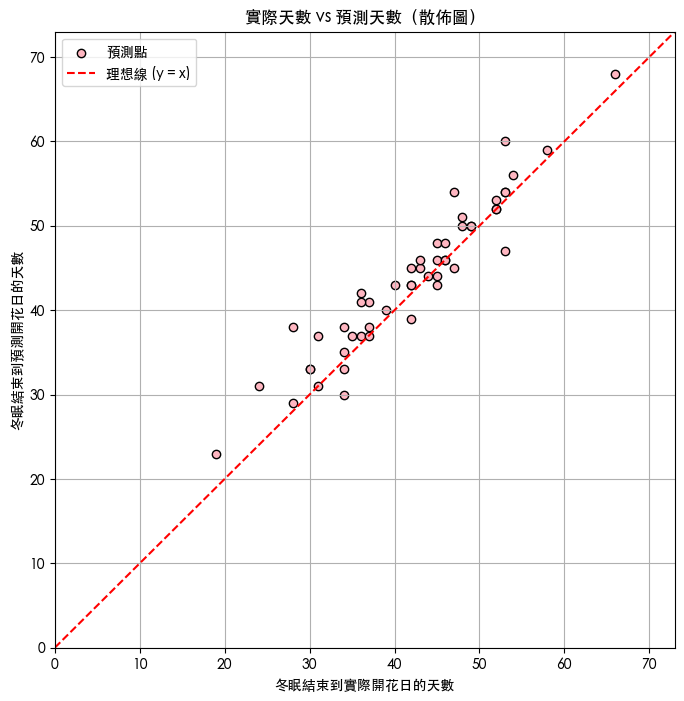

In [69]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('實際天數 vs 預測天數（E=30）', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
# 找到 Ea=35 在 ea_range 中的位置
target_ea = 35
target_idx = ea_range.index(target_ea)  # 找到Ea=40是第幾個

# 查看 Ea=35 的推估 vs 真實結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 54, 實際天數 = 52, 誤差 = 2
Year 1962: 推估天數 = 51, 實際天數 = 49, 誤差 = 2
Year 1963: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1964: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1965: 推估天數 = 61, 實際天數 = 53, 誤差 = 8
Year 1966: 推估天數 = 34, 實際天數 = 34, 誤差 = 0
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 42, 實際天數 = 45, 誤差 = -3
Year 1969: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1970: 推估天數 = 59, 實際天數 = 58, 誤差 = 1
Year 1971: 推估天數 = 46, 實際天數 = 46, 誤差 = 0
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 46, 實際天數 = 45, 誤差 = 1
Year 1974: 推估天數 = 53, 實際天數 = 52, 誤差 = 1
Year 1975: 推估天數 = 55, 實際天數 = 47, 誤差 = 8
Year 1976: 推估天數 = 41, 實際天數 = 37, 誤差 = 4
Year 1977: 推估天數 = 42, 實際天數 = 40, 誤差 = 2
Year 1978: 推估天數 = 53, 實際天數 = 48, 誤差 = 5
Year 1979: 推估天數 = 37, 實際天數 = 31, 誤差 = 6
Year 1980: 推估天數 = 51, 實際天數 = 49, 誤差 = 2
Year 1981: 推估天數 = 46, 實際天數 = 43, 誤差 = 3
Year 1982: 推估天數 = 38, 實際天數 = 37, 誤差 = 1
Year 1983: 推估天數 = 48, 實際天數 = 45, 誤差 = 3
Year 1984: 推估天數 = 69, 實際天數 = 66, 誤差 = 3
Year 1985: 推估天數 = 53, 實際天數 = 52, 誤差 =

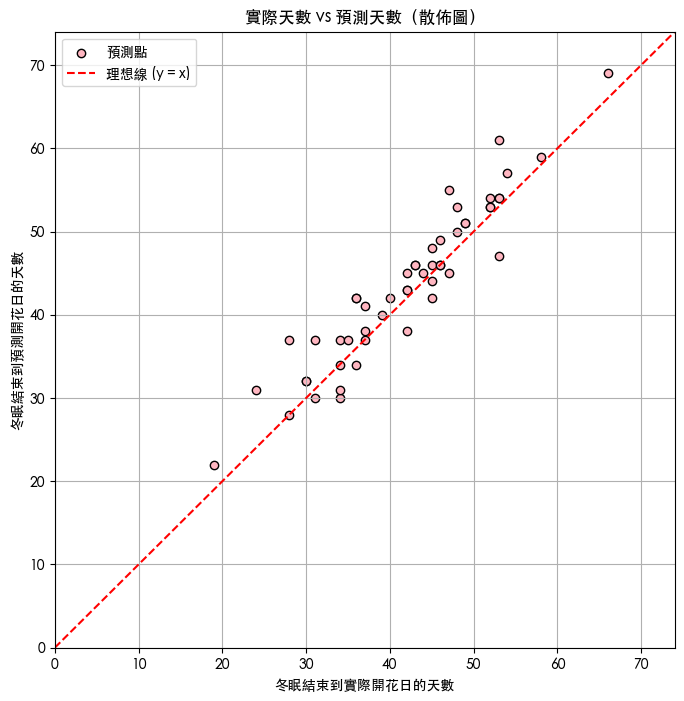

In [71]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('實際天數 vs 預測天數（E=35）', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
# 找到 Ea=40 在 ea_range 中的位置
target_ea = 40
target_idx = ea_range.index(target_ea)  # 找到Ea=40是第幾個

# 查看 Ea=40 的推估 vs 真實結果
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['年']}: 推估天數 = {bloom_days_per_ea[target_idx][year_idx]}, 實際天數 = {actual_bloom_days[year_idx]}, 誤差 = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: 推估天數 = 54, 實際天數 = 52, 誤差 = 2
Year 1962: 推估天數 = 51, 實際天數 = 49, 誤差 = 2
Year 1963: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1964: 推估天數 = 54, 實際天數 = 53, 誤差 = 1
Year 1965: 推估天數 = 63, 實際天數 = 53, 誤差 = 10
Year 1966: 推估天數 = 33, 實際天數 = 34, 誤差 = -1
Year 1967: 推估天數 = 45, 實際天數 = 47, 誤差 = -2
Year 1968: 推估天數 = 41, 實際天數 = 45, 誤差 = -4
Year 1969: 推估天數 = 47, 實際天數 = 53, 誤差 = -6
Year 1970: 推估天數 = 60, 實際天數 = 58, 誤差 = 2
Year 1971: 推估天數 = 46, 實際天數 = 46, 誤差 = 0
Year 1972: 推估天數 = 43, 實際天數 = 42, 誤差 = 1
Year 1973: 推估天數 = 47, 實際天數 = 45, 誤差 = 2
Year 1974: 推估天數 = 54, 實際天數 = 52, 誤差 = 2
Year 1975: 推估天數 = 56, 實際天數 = 47, 誤差 = 9
Year 1976: 推估天數 = 42, 實際天數 = 37, 誤差 = 5
Year 1977: 推估天數 = 42, 實際天數 = 40, 誤差 = 2
Year 1978: 推估天數 = 54, 實際天數 = 48, 誤差 = 6
Year 1979: 推估天數 = 37, 實際天數 = 31, 誤差 = 6
Year 1980: 推估天數 = 52, 實際天數 = 49, 誤差 = 3
Year 1981: 推估天數 = 46, 實際天數 = 43, 誤差 = 3
Year 1982: 推估天數 = 38, 實際天數 = 37, 誤差 = 1
Year 1983: 推估天數 = 48, 實際天數 = 45, 誤差 = 3
Year 1984: 推估天數 = 71, 實際天數 = 66, 誤差 = 5
Year 1985: 推估天數 = 53, 實際天數 = 52, 誤差

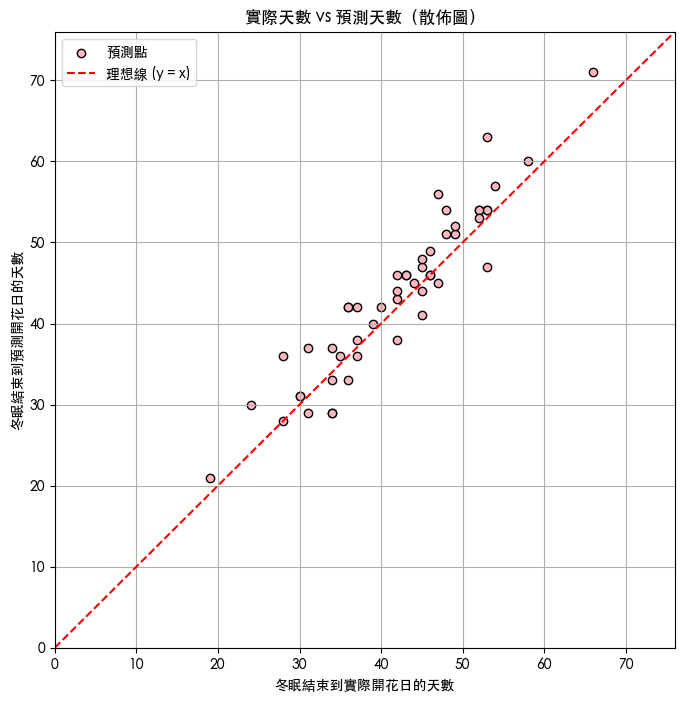

In [73]:
# 畫散佈圖
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='預測點')

# 畫理想線 y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='理想線 (y = x)')

# 標題與座標
plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('實際天數 vs 預測天數（E=40）', dpi=300, bbox_inches='tight')
plt.show()

### 使用測試集來驗證活化能在 Ea = 26時的預測準確度

In [75]:
testyears = sorted(test_dj_dict.keys())

def get_actual_bloom_days(test):
    actual_bloom_days = []
    
    for year in testyears:
        # 找這一年的開花日
        blossom_row = test[(test["年"] == year) & (test["開花日"] == 1)]
        
        if blossom_row.empty:
            # 如果這年沒有資料，就跳過
            continue

        month = int(blossom_row["月"].values[0])
        day = int(blossom_row["日"].values[0])
        
        # 計算這一天是那一年的第幾天
        base_date = datetime.date(year, 1, 1)
        bloom_date = datetime.date(year, month, day)
        actual_day = (bloom_date - base_date).days + 1
        
        actual_bloom_days.append(actual_day)

    return testyears, actual_bloom_days

In [76]:
testyears, actual_bloom_days = get_actual_bloom_days(test)

for year, bloom_day in zip(testyears, actual_bloom_days):
    print(f'{year}年的開花日是第{bloom_day}天')

2012年的開花日是第91天
2013年的開花日是第75天
2014年的開花日是第84天
2015年的開花日是第82天
2016年的開花日是第81天
2017年的開花日是第80天
2018年的開花日是第76天
2019年的開花日是第80天
2020年的開花日是第74天
2021年的開花日是第73天
2022年的開花日是第79天
2023年的開花日是第73天
2024年的開花日是第89天


In [140]:
# 先轉換成 Kelvin
test['avg_temp_kelvin'] = test['平均氣溫'] + 273.15

# 儲存預測結果
predicted_bloom_dates = []
actual_bloom_dates = []
prediction_errors = []
years_list = []

# 用 test_allyears_dj_days 的每一年跑
for idx, row in test_allyears_dj_days.iterrows():
    year = row['年']
    wake_up_date = row['冬眠結束日']  # 注意這裡是冬眠結束日，已經是 datetime.date 型態了

    # 找到冬眠結束日的index
    start_row = test[
        (test['年'] == wake_up_date.year) &
        (test['月'] == wake_up_date.month) &
        (test['日'] == wake_up_date.day)
    ]
    if start_row.empty:
        continue

    start_idx = start_row.index[0]
    accumulated_DTS = 0
    current_idx = start_idx

    # 用最佳的 best_ea 和 best_dtsm 累積DTS
    while accumulated_DTS <= best_dtsm:
        if current_idx >= len(test):
            break

        temp_celsius = test.loc[current_idx, '平均氣溫']
        temp_kelvin = temp_celsius + 273.15
        exp_val = np.exp((best_ea * (temp_kelvin - Ts)) / (temp_kelvin * Ts * R))
        accumulated_DTS += exp_val

        current_idx += 1

    bloom_idx = current_idx

    # 預測開花日
    estimated_bloom_date = datetime.date(
        test.loc[bloom_idx, '年'],
        test.loc[bloom_idx, '月'],
        test.loc[bloom_idx, '日']
    )

    # ---------
    # 找實際開花日
    blossom_row = test[(test['年'] == year) & (test['開花日'] == 1)]
    if blossom_row.empty:
        continue

    blossom_idx = blossom_row.index[0]
    real_bloom_date = datetime.date(
        test.loc[blossom_idx, '年'],
        test.loc[blossom_idx, '月'],
        test.loc[blossom_idx, '日']
    )

    # ---------
    # 記錄結果
    years_list.append(year)
    predicted_bloom_dates.append(estimated_bloom_date)
    actual_bloom_dates.append(real_bloom_date)
    prediction_errors.append(abs((real_bloom_date - estimated_bloom_date).days))

# ----------------------------
# 整理成 DataFrame
result_df = pd.DataFrame({
    '年': years_list,
    '實際開花日': actual_bloom_dates,
    '預測開花日': predicted_bloom_dates,
    '誤差天數': prediction_errors
})

# 顯示預測結果
result_df

,年,實際開花日,預測開花日,誤差天數
0,2012,2012-03-31,2012-03-31,0
1,2013,2013-03-16,2013-03-19,3
2,2014,2014-03-25,2014-03-27,2
3,2015,2015-03-23,2015-03-28,5
4,2016,2016-03-21,2016-03-24,3
5,2017,2017-03-21,2017-03-30,9
6,2018,2018-03-17,2018-03-24,7
7,2019,2019-03-21,2019-03-22,1
8,2020,2020-03-14,2020-03-23,9
9,2021,2021-03-14,2021-03-23,9


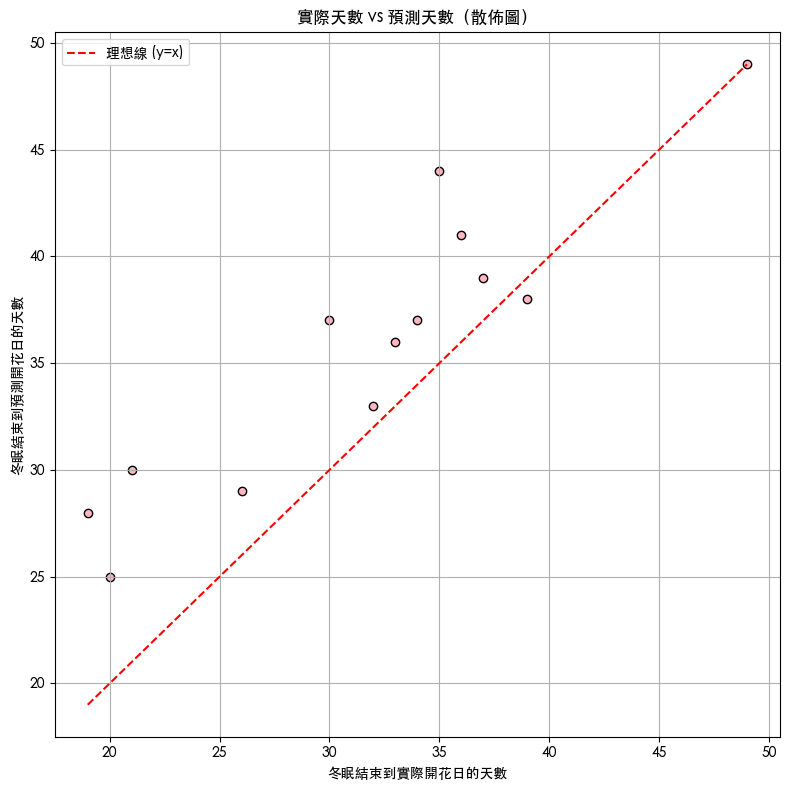

In [136]:
plt.figure(figsize=(8, 8))
plt.scatter(actual_bloom_days_test, predicted_bloom_days_test, color='lightpink', edgecolor='black')
plt.plot([min(actual_bloom_days_test), max(actual_bloom_days_test)],
         [min(actual_bloom_days_test), max(actual_bloom_days_test)],
         'r--', label='理想線 (y=x)')

plt.xlabel('冬眠結束到實際開花日的天數')
plt.ylabel('冬眠結束到預測開花日的天數')
plt.title('實際天數 vs 預測天數（散佈圖）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('實際天數 vs 預測天數（E=26）Test', dpi=300, bbox_inches='tight')
plt.show()

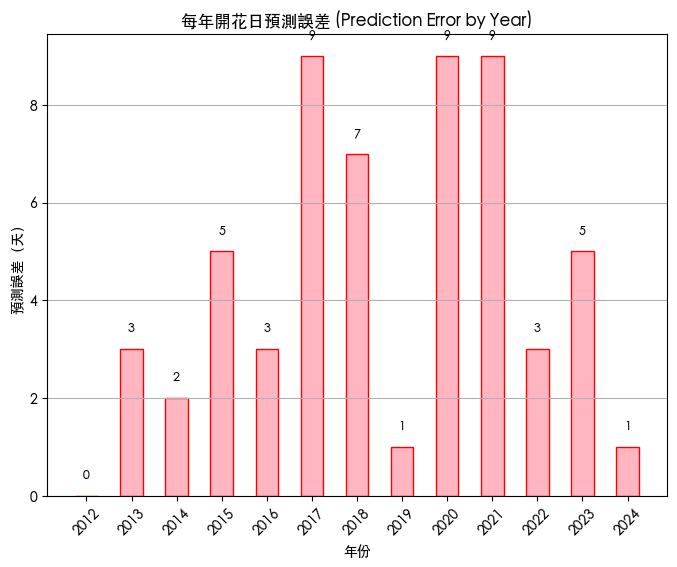

In [134]:
plt.figure(figsize=(8,6))
bars = plt.bar(years_list, prediction_errors, color='lightpink', width=0.5, edgecolor='red')

plt.xlabel('年份')
plt.ylabel('預測誤差（天）')
plt.title('每年開花日預測誤差 (Prediction Error by Year)')
plt.xticks(years_list, rotation=45)
plt.grid(axis='y')

# 加上每條上面的數值標籤
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 文字的x座標：條中心
        height + 0.3,                      # 文字的y座標：條上方一點
        f'{height:.0f}',                   # 顯示的數字（取整數）
        ha='center', va='bottom', fontsize=9  # 置中對齊，小字體
    )
plt.savefig('每年開花日預測誤差', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
actual_bloom_days_test = []
predicted_bloom_days_test = []

for idx, row in test_allyears_dj_days.iterrows():
    year = row['年']
    wake_up_date = row['冬眠結束日']

    # 找到預測開花日和真實開花日
    predicted_date = predicted_bloom_dates[idx]
    actual_date = actual_bloom_dates[idx]

    # 直接拿冬眠結束日來算天數
    predicted_days = (predicted_date - wake_up_date).days
    actual_days = (actual_date - wake_up_date).days

    predicted_bloom_days_test.append(predicted_days)
    actual_bloom_days_test.append(actual_days)

# ----------------------------
# 直接算 R² 分數
from sklearn.metrics import r2_score

r2 = r2_score(actual_bloom_days_test, predicted_bloom_days_test)
print(f"\n🌸 測試集 R² 分數（以冬眠結束日為基準）：{r2:.4f}")


🌸 測試集 R² 分數（以冬眠結束日為基準）：0.5665
